In [ ]:
pip install -r Package_initialization.txt

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# we load our saved model
loaded_model = load_model("resnet_model.keras")

# we unfreeze some of the earlier layers for fine-tuning
for layer in loaded_model.layers[:-10]:  
    layer.trainable = True

# here we get the output of the second-to-last layer in the loaded model
second_to_last_layer_output = loaded_model.layers[-2].output

# we then add a new Dense layer with 512 units and ReLU activation
new_layer = Dense(512, activation='relu', name='additional_dense')(second_to_last_layer_output)

# we add a dropout regularization layer
new_layer_with_dropout = Dropout(0.5)(new_layer)

# we then concatenate the new layer with the original output layer
output_layer = loaded_model.layers[-1](new_layer_with_dropout)

# finally we can create a new model by specifying inputs and outputs
new_model = tf.keras.Model(inputs=loaded_model.input, outputs=output_layer)


#def scheduler(epoch, lr):
 #   if epoch < 10:
  #      return lr
   # else:
    #    return lr * tf.math.exp(-0.1)

# we compile the new model
new_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


#lr_scheduler = LearningRateScheduler(scheduler)


#history = new_model.fit(train_generator, steps_per_epoch=train_steps_per_epoch,
                        #validation_data=validation_generator, validation_steps=val_steps_per_epoch,
                        #epochs=20, callbacks=[lr_scheduler])




/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

# we define an image data generator for preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)


train_dir = '../Final project new/Image data/training'
validation_dir = '../Final project new/Image data/validation'
test_dir = '../Final project new/Image data/test'

# we generate augmented images for training
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Since we have binary classification (real and fake)
)

# we generate augmented images for validation
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# we generate augmented images for testing
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# here we calculate the number of steps per epoch for training and validation
train_steps_per_epoch = train_generator.samples // train_generator.batch_size
val_steps_per_epoch = validation_generator.samples // validation_generator.batch_size


print("Number of training images:", train_generator.samples)
print("Number of validation images:", validation_generator.samples)
print("Number of testing images:", test_generator.samples)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Number of training images: 6000
Number of validation images: 2000
Number of testing images: 2000


In [3]:
# we fit the tuned model to the data
history = new_model.fit(train_generator, steps_per_epoch=train_steps_per_epoch,
                        validation_data=validation_generator, validation_steps=val_steps_per_epoch,
                        epochs=5, callbacks=[lr_scheduler])

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 694s 3s/step - accuracy: 0.7376 - loss: 0.5260 - val_accuracy: 0.6694 - val_loss: 0.8887 - learning_rate: 1.0000e-04
Epoch 2/5
  1/187 ━━━━━━━━━━━━━━━━━━━━ 10:20 3s/step - accuracy: 0.9375 - loss: 0.2152

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9375 - loss: 0.2152 - val_accuracy: 0.8125 - val_loss: 0.6950 - learning_rate: 1.0000e-04
Epoch 3/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 636s 3s/step - accuracy: 0.8886 - loss: 0.2693 - val_accuracy: 0.8130 - val_loss: 0.5473 - learning_rate: 1.0000e-04
Epoch 4/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8750 - loss: 0.1758 - val_accuracy: 0.8125 - val_loss: 0.4517 - learning_rate: 1.0000e-04
Epoch 5/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 636s 3s/step - accuracy: 0.9278 - loss: 0.1868 - val_accuracy: 0.8674 - val_loss: 0.3493 - learning_rate: 1.0000e-04


In [4]:

# finally we evaluate on the test data
test_loss, test_accuracy = new_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 652ms/step - accuracy: 0.8685 - loss: 0.2965
Test Accuracy: 0.8650000095367432


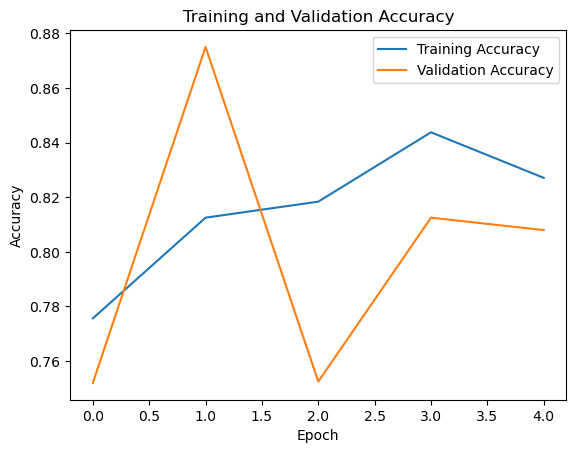

In [8]:
import matplotlib.pyplot as plt

# we plot training and validation accuracy for some visual inspection
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()